# Using Inbuilt Naive Bayes Classifier

In [1]:
#Various models required
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

In [2]:
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [4]:
#X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
#Y is the category

#change the path of dataset as required
X  =[] 
Y = []
for category in os.listdir("D:\\Text Classification\\Datasets"):
    for document in os.listdir("D:\\Text Classification\\Datasets\\"+category):
        with open("D:\\Text Classification\\Datasets\\"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [5]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#We can see it is a tuple with first element as name of document and second text of document.
print(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines:

In [6]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [7]:
#split has done in nearly 3:1 ratio
print(len(x_train))
print(len(x_test))

14997
5000


In [9]:
#Example for showing re.split
sample_text="Hey! I am Yatin. I am Good."
print(re.split(r'\W+',sample_text))

['Hey', 'I', 'am', 'Yatin', 'I', 'am', 'Good', '']


In [10]:
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'newsgroups': 15305,
 'rec': 4823,
 'sport': 1740,
 'hockey': 1484,
 'path': 15253,
 'cantaloupe': 19550,
 'srv': 24268,
 'cmu': 39279,
 'edu': 123229,
 'das': 4576,
 'news': 25799,
 'harvard': 5203,
 'noc': 4690,
 'near': 5198,
 'net': 19200,
 'howland': 8280,
 'reston': 8249,
 'ans': 8343,
 'cso': 2233,
 'uiuc': 3014,
 'uxa': 352,
 'horton': 17,
 'death': 837,
 'success': 210,
 'subject': 16191,
 'leafs': 225,
 'crushed': 18,
 'blues': 191,
 'win': 1017,
 'flames': 252,
 'back': 2706,
 'date': 15584,
 'fri': 1777,
 'apr': 15381,
 'gmt': 13323,
 'message': 16476,
 'alg': 4,
 'references': 9764,
 'vzhivov': 20,
 'cunews': 142,
 'wuecl': 66,
 'wustl': 221,
 'sender': 8296,
 'usenet': 6338,
 'noise': 452,
 'owner': 451,
 'organization': 14843,
 'university': 7442,
 'illinois': 478,
 'urbana': 306,
 'lines': 15674,
 'joseph': 385,
 'charles': 372,
 'achkar': 17,
 'writes': 11109,
 'article': 10149,
 'alfred': 32,
 'carleton': 402,
 'vladimir': 26,
 'zhivov': 6,
 'shut': 150,
 'hawks': 11

In [11]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 123229),
 ('cmu', 39279),
 ('com', 37725),
 ('news', 25799),
 ('not', 25097),
 ('srv', 24268),
 ('cantaloupe', 19550),
 ('net', 19200),
 ('message', 16476),
 ('subject', 16191),
 ('lines', 15674),
 ('date', 15584),
 ('apr', 15381),
 ('newsgroups', 15305),
 ('path', 15253),
 ('can', 15062),
 ('organization', 14843),
 ('state', 14006),
 ('gmt', 13323),
 ('ohio', 11840),
 ('one', 11682),
 ('will', 11608),
 ('writes', 11109),
 ('article', 10149),
 ('comp', 9817),
 ('references', 9764),
 ('talk', 9221),
 ('misc', 8861),
 ('ans', 8343),
 ('sender', 8296),
 ('howland', 8280),
 ('reston', 8249),
 ('don', 8023),
 ('people', 7872),
 ('like', 7761),
 ('just', 7485),
 ('posting', 7475),
 ('university', 7442),
 ('nntp', 7138),
 ('know', 6912),
 ('mps', 6872),
 ('host', 6784),
 ('sci', 6597),
 ('get', 6523),
 ('usenet', 6338),
 ('think', 6223),
 ('zaphod', 6194),
 ('may', 6093),
 ('alt', 5991),
 ('politics', 5908),
 ('windows', 5812),
 ('also', 5603),
 ('use', 5281),
 ('rutgers', 5237),
 ('

In [12]:
import matplotlib.pyplot as plt


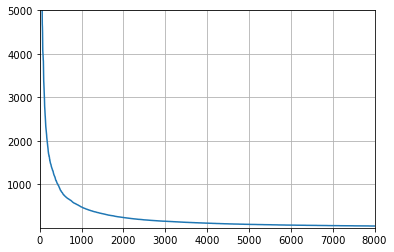

In [13]:
#Plotting graph on no. of words vs frequency 
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   


In [14]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'can',
 'organization',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'sender',
 'howland',
 'reston',
 'don',
 'people',
 'like',
 'just',
 'posting',
 'university',
 'nntp',
 'know',
 'mps',
 'host',
 'sci',
 'get',
 'usenet',
 'think',
 'zaphod',
 'may',
 'alt',
 'politics',
 'windows',
 'also',
 'use',
 'rutgers',
 'time',
 'harvard',
 'near',
 'eng',
 'new',
 'rec',
 'good',
 'noc',
 'system',
 'well',
 'crabapple',
 'sei',
 'das',
 'xref',
 'soc',
 'now',
 'cis',
 'even',
 'see',
 'europa',
 'gtefsd',
 'ece',
 'god',
 'uunet',
 'world',
 'way',
 'religion',
 'org',
 'two',
 'christian',
 'make',
 'much',
 'first',
 'say',
 'many',
 'gov',
 'rochester',
 'right',
 'distribution',
 'club',
 'mail',
 'gatech',
 'want',
 'space',
 'andrew',
 'anyone',
 'magnesium',
 '

In [15]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [16]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [17]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[11  1  0 ...  0  0  0]
 [ 5  3  1 ...  0  0  0]
 [ 5  4 11 ...  0  0  0]
 ...
 [14  3  0 ...  0  0  0]
 [ 9  4  6 ...  0  0  0]
 [ 6  2  5 ...  1  0  0]]
--------------------------
[[10  4  2 ...  0  0  0]
 [ 9  1  0 ...  0  0  0]
 [ 7  1  8 ...  0  0  0]
 ...
 [ 4  1  6 ...  0  0  0]
 [13  5  1 ...  0  0  0]
 [ 7  2  4 ...  0  0  0]]


In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [19]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on training data: 0.890378075615123
Score on testing data: 0.8592
[[189   0   0   0   1   0   2   2   2   1   0   0   1   0   0   0   0   1
    1  35]
 [  0 192  20   8  12   8  10   1   0   0   0   0   5   0   1   0   0   0
    0   0]
 [  0   1 205  17   3   8   5   1   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   6   8 204  19   0   4   0   1   0   0   0   5   0   0   0   0   0
    0   0]
 [  0   1   1  26 216   0   4   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0  12  32   7   7 180   4   0   0   0   0   0   4   1   0   0   0   1
    0   0]
 [  0   0   0   4   2   1 244   5   0   0   0   0   2   0   3   0   0   0
    0   0]
 [  0   0   0   0   0   0   4 204   6   0   0   0   2   0   0   0   0   0
    2   0]
 [  0   0   0   0   0   0   5   3 251   1   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   3   2 240  11   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   1   0   2   2   1   7 252   0   0   0   1   0   0   0
    

# Self Implementation of Naive Baye's

In [20]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count


In [21]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
    

In [22]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [23]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [24]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [25]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)


In [26]:
dictionary

{'total_doc': 14997,
 'sci.electronics': {'edu': 5496,
  'cmu': 1896,
  'com': 1523,
  'news': 1051,
  'not': 605,
  'srv': 1161,
  'cantaloupe': 881,
  'net': 785,
  'message': 770,
  'subject': 760,
  'lines': 804,
  'date': 744,
  'apr': 768,
  'newsgroups': 736,
  'path': 740,
  'can': 662,
  'organization': 708,
  'state': 646,
  'gmt': 657,
  'ohio': 575,
  'one': 474,
  'will': 334,
  'writes': 408,
  'article': 395,
  'comp': 201,
  'references': 469,
  'talk': 20,
  'misc': 85,
  'ans': 386,
  'sender': 355,
  'howland': 379,
  'reston': 376,
  'don': 267,
  'people': 82,
  'like': 303,
  'just': 272,
  'posting': 341,
  'university': 360,
  'nntp': 355,
  'know': 295,
  'mps': 332,
  'host': 353,
  'sci': 977,
  'get': 256,
  'usenet': 278,
  'think': 158,
  'zaphod': 306,
  'may': 113,
  'alt': 87,
  'politics': 0,
  'windows': 21,
  'also': 204,
  'use': 367,
  'rutgers': 6,
  'time': 180,
  'harvard': 173,
  'near': 203,
  'eng': 287,
  'new': 124,
  'rec': 166,
  'good': 

In [27]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [28]:
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on testing_data: 0.8768
[[208   1   0   0   0   0   1   2   2   0   0   0   1   0   0   0   0   1
    0  19]
 [  0 202  12   7  11   6   8   1   0   0   0   1   6   3   0   0   0   0
    0   0]
 [  0   5 196  23   0  11   3   0   0   0   0   1   2   1   0   0   0   0
    1   0]
 [  0   5   3 217  17   0   3   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   1   1  16 224   1   5   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0  16  25   5   3 192   0   0   0   0   0   0   6   1   0   0   0   0
    0   0]
 [  0   0   0   7   2   0 242   6   0   0   0   0   3   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   6 201   5   0   0   0   2   2   0   0   0   0
    2   0]
 [  0   0   0   0   0   0   3   4 253   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   1 246  12   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   1   0   4 257   0   2   0   0   0   0   0
    0   0]
 [  0   1   0   0   0   0   2   0  

RESULT:

We have performed text-classification both by sklearn and self implementation.

We found out that sklearn gave score of 0.86 on testing_data,whereas self implemented classifier gave 0.88 on testing data,which is very close.

